In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../..')
from gp2 import Runner

In [3]:
!locate gp2


/lib/modules/5.4.0-104-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-104-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/raid/alphafold_data3/pdb_mmcif/mmcif_files/1gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/3gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/4gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/6gp2.cif
/usr/src/linux-headers-5.4.0-104/include/linux/input/gp2ap002a00f.h
/usr/src/linux-headers-5.4.0-104-generic/include/config/gp2ap020a00f.h
/usr/src/linux-headers-5.4.0-104-generic/include/config/input/gp2a.h
/usr

In [4]:

R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmp_jrft5k2GP2
Verbose mode active!


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')

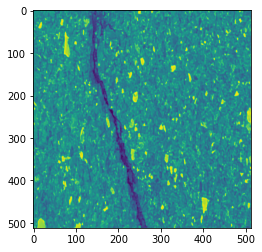

In [6]:
plt.imshow(images[500])

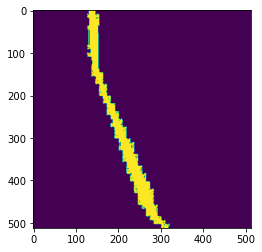

In [7]:
plt.imshow(masks[500])

In [8]:
len(images)

11298

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
#
#
R.setup_data(images, masks, dataset_size=11298, weights=weights)

Weights OK!


In [11]:
RUNS = 5

In [12]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
9/9 [==============================] - 37s 3s/step - loss: 1.4559 - dice_coeff: 0.1238 - val_loss: 1.5564 - val_dice_coeff: 0.1367
Epoch 2/100
9/9 [==============================] - 13s 2s/step - loss: 1.3252 - dice_coeff: 0.1608 - val_loss: 1.5501 - val_dice_coeff: 0.1364
Epoch 3/100
9/9 [==============================] - 13s 2s/step - loss: 1.2501 - dice_coeff: 0.1845 - val_loss: 1.5449 - val_dice_coeff: 0.1368
Epoch 4/100
9/9 [==============================] - 13s 2s/step - loss: 1.2062 - dice_coeff: 0.2012 - val_loss: 1.5373 - val_dice_coeff: 0.1369
Epoch 5/100
9/9 [==============================] - 13s 1s/step - loss: 1.1619 - dice_coeff: 0.2160 - val_loss: 1.5152 - val_dice_coeff: 0.1364
Epoch 6/100
9/9 [==============================] - 13s 2s/step - loss: 1.1284 - dice_coeff: 0.2303 - val_loss: 1.5057 - val_dice_coeff: 0.1365
Epoch 7/100
9/9 [==============================] - 13s 2s/step - loss: 1.1158 - dice_coeff: 0.2334 - val_loss: 1.4770 - val_dice_co

Epoch 58/100
9/9 [==============================] - 14s 2s/step - loss: 0.8150 - dice_coeff: 0.3844 - val_loss: 0.9925 - val_dice_coeff: 0.2660
Epoch 59/100
9/9 [==============================] - 14s 2s/step - loss: 0.8119 - dice_coeff: 0.3867 - val_loss: 1.0385 - val_dice_coeff: 0.2289
Epoch 60/100
9/9 [==============================] - 13s 2s/step - loss: 0.8087 - dice_coeff: 0.3886 - val_loss: 0.9722 - val_dice_coeff: 0.2823
Epoch 61/100
9/9 [==============================] - 14s 2s/step - loss: 0.8028 - dice_coeff: 0.3918 - val_loss: 0.9816 - val_dice_coeff: 0.2756
Epoch 62/100
9/9 [==============================] - 13s 2s/step - loss: 0.8009 - dice_coeff: 0.3933 - val_loss: 0.9703 - val_dice_coeff: 0.2833
Epoch 63/100
9/9 [==============================] - 14s 2s/step - loss: 0.7979 - dice_coeff: 0.3942 - val_loss: 0.9418 - val_dice_coeff: 0.3077
Epoch 64/100
9/9 [==============================] - 14s 2s/step - loss: 0.7926 - dice_coeff: 0.3970 - val_loss: 0.9777 - val_dice_coeff:

Replacing 115 from 346 !
D_relabeled_ 115
selected_ids ['e45be1e8-b0d9-43bb-92d2-f176e1f21fea', 'dde6608a-0d03-45a3-b736-aae0eda0a8e4', 'eda4d056-6fb0-48d5-95a3-9414b4d099a5', '79dd7050-0e4d-4d3f-969b-d2a8d745f39a', 'ff08f3e4-8dc6-4390-a743-165fe8232e3c', '80456f6f-53bf-46c4-bc6b-7dfa22112f75', '6575a5b9-0c5e-4bd0-9456-14533e61d651', '04e915a2-fea3-48e6-a2af-c3117df9d5a4', 'f0a8a055-38d1-4004-9dda-921392b897ac', '3d150b44-b3ad-428a-a75a-5268659347b1', '2d5d6ac3-916e-4eba-92d3-6e863be39992', '1c7530e3-6ae3-43fc-ae26-9020af53f3d8', '1a49d0c7-82d1-4947-84c6-8c0f2b00d459', '0e45359c-1018-4c19-971d-a99c64d7e440', '1641c353-8d03-4310-b769-5b0dc5101f64', '2563ed28-9156-48f7-9c73-a5cbf88033eb', '3bd5a93f-7b9d-41a0-89cd-11dbe9b32f4f', '74382e9f-f338-45e2-8762-c8340a6548ab', '5cd1d249-f17e-4583-91ca-e8234e810891', '92758f2c-a861-48cf-ab05-c7aae1e2e78d', '0eab2f85-80e8-466b-8678-1d3e33edf4cf', '3eb88db3-d8a4-4c7b-b4a9-fa7846470ce2', '77e71a54-2f3e-4da4-ae82-4b5f56b2b37f', 'b29224be-08e3-4510-815b

Epoch 1/100
11/11 [==============================] - 21s 2s/step - loss: 0.7238 - dice_coeff: 0.4450 - val_loss: 1.0841 - val_dice_coeff: 0.1710
Epoch 2/100
11/11 [==============================] - 15s 1s/step - loss: 0.6960 - dice_coeff: 0.4605 - val_loss: 0.8143 - val_dice_coeff: 0.4402
Epoch 3/100
11/11 [==============================] - 15s 1s/step - loss: 0.6740 - dice_coeff: 0.4733 - val_loss: 0.7741 - val_dice_coeff: 0.4387
Epoch 4/100
11/11 [==============================] - 15s 1s/step - loss: 0.6666 - dice_coeff: 0.4771 - val_loss: 0.8179 - val_dice_coeff: 0.3935
Epoch 5/100
11/11 [==============================] - 15s 1s/step - loss: 0.6578 - dice_coeff: 0.4833 - val_loss: 0.7963 - val_dice_coeff: 0.4177
Epoch 6/100
11/11 [==============================] - 15s 1s/step - loss: 0.6522 - dice_coeff: 0.4870 - val_loss: 0.7822 - val_dice_coeff: 0.4246
Epoch 7/100
11/11 [==============================] - 15s 1s/step - loss: 0.6611 - dice_coeff: 0.4816 - val_loss: 0.8071 - val_dice

Replacing 105 from 315 !
D_relabeled_ 105
selected_ids ['e85c4b4c-88ab-43d5-a4e0-4d760684199c', 'f5d2b0fd-aa85-48a0-bca0-014436180e3d', 'ac1802cb-7dde-4d99-abcc-80bb81c942d1', '034c5f60-bd0e-4541-877b-68264cee1f52', '145d19b2-5dc7-40ee-8bb2-4373399aaa2e', 'd454cd70-dbea-4080-8fa9-ed038062f3a0', '073a3eeb-8e88-4b1f-8815-99fdd0c36e9b', '6fe225c5-4134-4105-9e40-8d859cff6643', 'f55a0623-77b6-42d1-a2b5-77df7bf20e65', 'cfb88862-b545-4af8-8b57-a583ad9ca3d4', '53265804-28ae-4348-adb7-af6adab924fe', '23b2f127-e397-439e-932c-bd151efdf49a', 'e22f61d4-4ab8-47ea-92bf-cddeb50a1fb7', '5e012e23-8cfa-4ea0-aa95-13071312c375', '1d8220e7-5c74-4560-8046-02735ca418e8', '88cb644a-11b7-409b-806e-7c3250055aca', '00802a99-76e9-4757-80b9-ff011953eb5f', '60fa5811-667c-411c-90d0-a8d5f70a5cdb', 'dc005871-a133-41be-b1de-730ef40fd89e', 'b3f4ecf7-2ca4-4f56-a12a-b21bb6a3515a', 'cc25185d-4f4d-45c8-8db3-f31b8843de7a', '76232b94-5ad3-408f-bfc6-0b1d2e250014', '343dd74a-7c92-4def-92d2-36c8316bd388', '2363edca-b61c-459a-99d4

Epoch 1/100
13/13 [==============================] - 21s 2s/step - loss: 0.6010 - dice_coeff: 0.5279 - val_loss: 0.8298 - val_dice_coeff: 0.4528
Epoch 2/100
13/13 [==============================] - 17s 1s/step - loss: 0.5723 - dice_coeff: 0.5468 - val_loss: 0.7825 - val_dice_coeff: 0.4469
Epoch 3/100
13/13 [==============================] - 16s 1s/step - loss: 0.5612 - dice_coeff: 0.5485 - val_loss: 0.7302 - val_dice_coeff: 0.4687
Epoch 4/100
13/13 [==============================] - 16s 1s/step - loss: 0.5522 - dice_coeff: 0.5556 - val_loss: 0.7764 - val_dice_coeff: 0.4519
Epoch 5/100
13/13 [==============================] - 16s 1s/step - loss: 0.5456 - dice_coeff: 0.5616 - val_loss: 0.7212 - val_dice_coeff: 0.4773
Epoch 6/100
13/13 [==============================] - 17s 1s/step - loss: 0.5374 - dice_coeff: 0.5688 - val_loss: 0.7422 - val_dice_coeff: 0.4963
Epoch 7/100
13/13 [==============================] - 17s 1s/step - loss: 0.5352 - dice_coeff: 0.5687 - val_loss: 0.7400 - val_dice

Replacing 106 from 320 !
D_relabeled_ 106
selected_ids ['9a11bd31-3fbf-442a-a07f-e246370c5b09', '73402f4b-c75b-427c-891a-4cd0a5ae4125', '334beb71-c99a-4443-9ba1-e68d00f74878', '9b89559f-5554-4e9c-95df-3e0dd3fb29cd', 'f5867402-71ae-4457-981b-ab8eb471488f', 'b141d1f3-9a15-4728-aa77-c377b1609471', 'ad419a62-690a-4f7a-af8f-278f85664a03', 'afa26534-4c06-4469-a538-98826a276d8b', '89e100c0-51f7-4016-b62e-539949a9cb6c', '7cfb5d1d-10ad-4e3c-ba4f-94d2e17a027c', '44f5db7a-08bb-45f4-98bd-f8204d02b52e', '585bac0c-7943-4665-830c-6db85700ed80', '0bed3dbe-4b74-4317-b02e-1aa23822ee52', '04884238-1424-4b81-ae7b-681aa6053cc0', '372638d5-02ec-4a3f-80e1-a66bea56f9eb', 'e5198ea1-0087-4eb3-b8f1-15f7a32a0770', '737c53f0-4613-420e-8f4e-fce2ee6282a6', '99db4df2-1c6c-4bc9-b2f9-f348316c4b75', 'e3c59dff-7370-43d7-9f32-520124c4d552', '9d3d7704-1107-4823-9266-fdc053bb7240', 'e8e6bfcc-8be3-46fc-bfda-b604b298db77', 'bc6be852-f09a-4469-bae1-6fd4ea6384c0', '6f7342f8-6b8b-4996-9d5f-4fc43852d60c', '5d5ceb3d-7593-4730-acdd

Epoch 1/100
14/14 [==============================] - 25s 2s/step - loss: 0.4844 - dice_coeff: 0.6081 - val_loss: 0.6779 - val_dice_coeff: 0.5081
Epoch 2/100
14/14 [==============================] - 18s 1s/step - loss: 0.4637 - dice_coeff: 0.6208 - val_loss: 0.7805 - val_dice_coeff: 0.4153
Epoch 3/100
14/14 [==============================] - 18s 1s/step - loss: 0.4529 - dice_coeff: 0.6287 - val_loss: 0.7462 - val_dice_coeff: 0.4589
Epoch 4/100
14/14 [==============================] - 18s 1s/step - loss: 0.4531 - dice_coeff: 0.6289 - val_loss: 0.6725 - val_dice_coeff: 0.5093
Epoch 5/100
14/14 [==============================] - 18s 1s/step - loss: 0.4383 - dice_coeff: 0.6395 - val_loss: 0.6786 - val_dice_coeff: 0.4984
Epoch 6/100
14/14 [==============================] - 18s 1s/step - loss: 0.4344 - dice_coeff: 0.6425 - val_loss: 0.7242 - val_dice_coeff: 0.4632
Epoch 7/100
14/14 [==============================] - 18s 1s/step - loss: 0.4292 - dice_coeff: 0.6461 - val_loss: 0.6948 - val_dice

14/14 [==============================] - 18s 1s/step - loss: 0.2254 - dice_coeff: 0.8114 - val_loss: 0.7126 - val_dice_coeff: 0.4930
Epoch 58/100
14/14 [==============================] - 18s 1s/step - loss: 0.2264 - dice_coeff: 0.8111 - val_loss: 0.6183 - val_dice_coeff: 0.5712
Epoch 59/100
14/14 [==============================] - 18s 1s/step - loss: 0.2207 - dice_coeff: 0.8159 - val_loss: 0.6242 - val_dice_coeff: 0.5785
Epoch 60/100
14/14 [==============================] - 18s 1s/step - loss: 0.2378 - dice_coeff: 0.8042 - val_loss: 0.6411 - val_dice_coeff: 0.5515
Epoch 61/100
14/14 [==============================] - 18s 1s/step - loss: 0.2131 - dice_coeff: 0.8218 - val_loss: 0.6111 - val_dice_coeff: 0.5760
Epoch 62/100
14/14 [==============================] - 18s 1s/step - loss: 0.2100 - dice_coeff: 0.8243 - val_loss: 0.6223 - val_dice_coeff: 0.5680
Epoch 63/100
14/14 [==============================] - 18s 1s/step - loss: 0.2108 - dice_coeff: 0.8241 - val_loss: 0.7339 - val_dice_coeff

Replacing 103 from 311 !
D_relabeled_ 103
selected_ids ['3571df74-aafc-4f8f-a3ab-42669fcb85c8', 'c12e41f6-f888-4542-bd22-ff3ad7574bbe', 'c3765b17-93bd-4eda-b4dd-a36e44a7c749', 'e71fa0ea-a9e0-41e7-81ce-a01788d6bad1', 'c039ec48-e6a6-4fbd-99cf-fcb75672b43b', '783e3624-5ac8-4e73-a908-e3a442f916ac', '42571fdb-8c03-4ded-97b7-c44d745b0b3f', '33c2db60-46fd-495a-a49f-58a69f41d0b9', '6f27f500-6d0e-4b29-a0c8-de14c88d5a9e', 'e555ca69-c519-49a7-8de5-4a3a931ccb20', '5fd0ce60-932b-4826-947e-f17dc42ece73', 'f34f0117-edc8-47ac-94e4-a1c4f5948dd4', 'b6a17635-de36-4d2f-9dc1-5fd21792286f', '6f2b7a86-b8ae-4d20-a924-158d906682cd', '6d8e0ce5-5adf-47c7-bfab-7ce83d0d85c4', '416b07ad-a2d6-45a8-a349-e6fb3f91a163', '30378642-7113-46b2-b994-8db8b8593ebb', 'e92161a1-c326-4ddf-ba35-fc64e735b4db', '4b147fe2-13ed-462c-bb71-2658a4c8f8f6', 'd5309eaf-6b63-4a14-b280-5641cc40f7e8', 'c98df875-c7dd-4f7c-b4da-05e4ae44d312', 'ec995cf2-44ac-4433-9550-541643e5394f', '62f62d43-ea85-4d03-850f-60f3c187004d', '4841dfc1-1d16-4b5f-b97b

Epoch 1/100
16/16 [==============================] - 25s 2s/step - loss: 0.1844 - dice_coeff: 0.8542 - val_loss: 0.6767 - val_dice_coeff: 0.5635
Epoch 2/100
16/16 [==============================] - 19s 1s/step - loss: 0.1620 - dice_coeff: 0.8715 - val_loss: 0.5709 - val_dice_coeff: 0.6303
Epoch 3/100
16/16 [==============================] - 19s 1s/step - loss: 0.1491 - dice_coeff: 0.8820 - val_loss: 0.5803 - val_dice_coeff: 0.6213
Epoch 4/100
16/16 [==============================] - 19s 1s/step - loss: 0.1446 - dice_coeff: 0.8855 - val_loss: 0.5918 - val_dice_coeff: 0.6154
Epoch 5/100
16/16 [==============================] - 19s 1s/step - loss: 0.1481 - dice_coeff: 0.8833 - val_loss: 0.5941 - val_dice_coeff: 0.6175
Epoch 6/100
16/16 [==============================] - 19s 1s/step - loss: 0.1392 - dice_coeff: 0.8895 - val_loss: 0.5646 - val_dice_coeff: 0.6343
Epoch 7/100
16/16 [==============================] - 19s 1s/step - loss: 0.1317 - dice_coeff: 0.8953 - val_loss: 0.5640 - val_dice

Replacing 114 from 343 !
D_relabeled_ 114
selected_ids ['116a5994-7e0d-41d7-9954-0085369b2aaa', '2aa52d0b-68d6-4de1-ab69-19af57b0bc52', 'ddf85410-6721-471a-b6e1-be099f5051ec', 'ea1a717d-5ce2-419e-ad0e-d39e34071c98', 'b03b08f1-3df5-4b31-ac04-5d821981bd56', '2cc0e4d4-baf1-4e2a-8bdc-6f5ac890c094', 'd7e0a55b-0202-4d4f-a6e5-7cc1a836d874', 'be624560-46b7-40f0-a1a8-d9127e399d10', '11b200e7-5781-44fd-899a-6497af0ba3ec', '5f0382cb-6ce6-4b30-bfb4-5d355dbca086', '0b890b35-7170-4033-bcb9-31c47d68ae65', 'e6b91b5c-a5e6-4fd5-aabf-d6fdb6cd0e2b', '9418ee8d-df71-4f5a-9e2c-dafe4b4225fd', 'fd681395-0cd8-4881-b47b-11b49c3e01bf', 'ea18ab73-b469-4d22-87d5-732373da111d', '83ae554b-86df-4740-853e-2610eff3989d', '4760b0a0-8b22-432e-9268-5bbe6a817594', '876949ab-e66f-45e1-853e-03bbceadb59e', '06ab403f-dd59-47e6-871c-614d6429c414', 'ec0d1014-fe42-4b8b-956e-199f9fc73d2b', '286c6948-6fdc-4a9c-9163-b94eb390e8a9', '256e0b4e-6710-444a-a69f-6be5c7a5c821', 'f6949ce8-1c3c-45f8-b43a-3dc59c414c56', 'a1239425-4e60-4f18-bd49

In [13]:
R.classifier_scores

[[0.9691429734230042, 0.33646222949028015],
 [0.8708868622779846, 0.35446780920028687],
 [0.9297226667404175, 0.27329713106155396],
 [0.6212139129638672, 0.5622626543045044],
 [0.5603551268577576, 0.6093025207519531]]

In [14]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

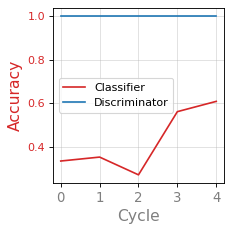

In [15]:
R.plot()